In [51]:
#load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pygwalker as pyg

In [52]:
#load data set
data = pd.read_csv('data/ts_weatherdata_2023-24.csv') #load dataset

In [53]:
data.info() #quick look of dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351018 entries, 0 to 351017
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             351018 non-null  int64  
 1   District               351018 non-null  object 
 2   Mandal                 351018 non-null  object 
 3   Date                   351018 non-null  object 
 4   Rain (mm)              351018 non-null  float64
 5   Min Temp (°C)          351018 non-null  float64
 6   Max Temp (°C)          351018 non-null  float64
 7   Min Humidity (%)       351018 non-null  float64
 8   Max Humidity (%)       351018 non-null  float64
 9   Min Wind Speed (Kmph)  350360 non-null  float64
 10  Max Wind Speed (Kmph)  350360 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 29.5+ MB


In [54]:
# convert the date column to datetime
data['Date'] = pd.to_datetime(data['Date']) 

C:\Users\1gole\AppData\Local\Temp\ipykernel_16608\3568450761.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [55]:
#drop unnamed useless columns
data = data.drop(columns='Unnamed: 0',axis=1)


In [56]:
#fill null values with mean
null_cols = ['Max Wind Speed (Kmph)','Min Wind Speed (Kmph)']
data[null_cols] = data[null_cols].fillna(data[null_cols].mean())

In [58]:
#create months & seasons columns 
data['months'] = data['Date'].dt.month


#function to convert months to seasons
def month_to_season(month):
    # Define a dictionary mapping each month to its corresponding season
    month_season_map = {
         1: 'Winter', 2: 'Winter', 3: 'Summer',
        4: 'Summer', 5: 'Summer', 6: 'Monsoon',
        7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon',
        10: 'Autumn', 11: 'Autumn', 12: 'Winter'
    }
    
    # Validate the input
    if not 1 <= month <= 12:
        raise ValueError("Month must be between 1 and 12")
    
    # Return the corresponding season
    return month_season_map[month]
#apply the function to create a seassons column
data['seasons'] = data['months'].apply(month_to_season,)
data.head() # show 5 rows

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),months,seasons
0,Adilabad,Adilabad Rural,2023-04-01,0.0,16.8,29.5,57.1,98.2,0.0,6.8,4,Summer
1,Adilabad,Adilabad Rural,2023-08-01,0.0,7.7,26.9,39.8,95.4,0.0,10.8,8,Monsoon
2,Adilabad,Adilabad Rural,2023-12-01,0.0,13.3,31.8,29.9,83.3,0.0,6.7,12,Winter
3,Adilabad,Adilabad Rural,2023-02-01,0.0,14.7,30.2,49.9,94.9,0.0,7.2,2,Winter
4,Adilabad,Adilabad Rural,2023-01-01,0.0,15.0,31.4,42.8,94.9,0.0,9.5,1,Winter


Text(0.5, 1.0, 'SEASONWISE WEATEHR CHANGE')

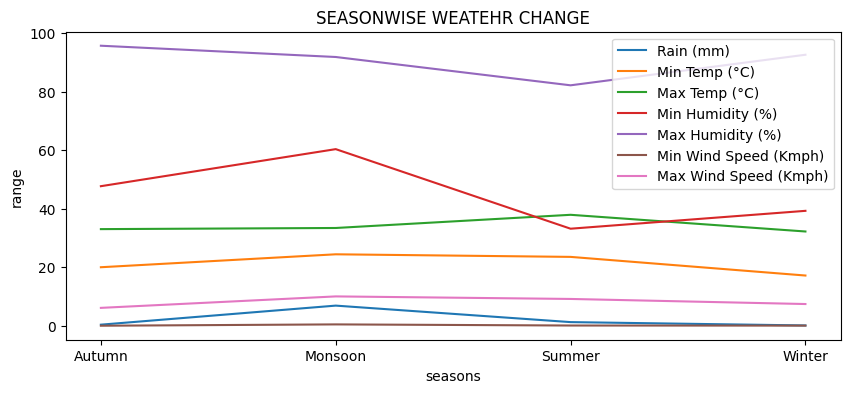

In [59]:
# ploting a graph to show how the weather behaves in four seasons 
required_colms = data.columns[3:-2] # selecting the colums to visualize

# gropuing the data according to seasons to easy visualization
vizdata_seasonwise = data.groupby('seasons').agg({col:'mean' for col in required_colms}) 

plt.figure(figsize=(10,4))
plt.plot(vizdata_seasonwise)
plt.legend(required_colms,loc='upper right')
plt.xlabel('seasons')
plt.ylabel('range')
plt.title('SEASONWISE WEATEHR CHANGE')